# Assignment 2 - Exercise 3
Bruno Kiyoshi Ynumaru - 201805995

 Uma empresa está tentando determinar onde deverá construir um depósito. A posição no plano x-y
(em quilometros) de quatro clientes e o número de entregas feitas anualmente para cada cliente são
dados na tabela abaixo. A empresa quer posicionar seu depósito neste plano de forma a minimizar
a distância total viajada anualmente pelos seus caminhões. Formule um modelo matemático com o
objetivo de determinar a posição deste depósito.

|Cliente |Pos. x |Pos. y |Número de fretes|
| --- | --- | --- | --- | 
|1| 5| 10| 200|
|2 |10 |5| 150|
|3 |0 |12 |200|
|4 |12 |0 |300|

In [1]:
import gurobipy as gp
from gurobipy import GRB, Model

In [2]:
# Create a new model
m = Model("Wyndor_Glass")

Restricted license - for non-production use only - expires 2022-01-13


In [3]:
# Create variables
x = m.addVar(lb=0, vtype=GRB.CONTINUOUS, name="x coordinate")
y = m.addVar(lb=0, vtype=GRB.CONTINUOUS, name="y coordinate")

In [4]:
# Set objective
def calc_distance(x1, y1, x2, y2):
    return ((x1 - x2) * (x1 - x2) + (y1 - y2) * (y1 - y2))

m.setObjective(200 * calc_distance(x, y, 5, 10) +
               150 * calc_distance(x, y, 10, 5) +
               200 * calc_distance(x, y, 0, 12) + 
               300 * calc_distance(x, y, 12, 0),
               GRB.MINIMIZE)

In [5]:
# Add constraints
# m.addConstr((x, y) != (5, 10), 'C0')
# m.addConstr((x, y) != (10, 5), 'C1')
# m.addConstr((x, y) != (0, 12), 'C2')
# m.addConstr((x, y) != (12, 0), 'C3')

# m.addConstr((x == 5) >> (y != 10), 'C0')
# m.addConstr((x == 10) >> (y != 5), 'C1')
# m.addConstr((x == 0) >> (y != 12), 'C2')
# m.addConstr((x == 12) >> (y != 0), 'C3')

m.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0xfaa5ebaf
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+04, 1e+04]
  QObjective range [2e+03, 2e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds
Optimal objective 4.07705882e+04


In [6]:
for v in m.getVars():
    print(f'{v.varName}, {v.x}')

print(f'Obj: {m.objVal}')

x coordinate, 7.176470588235294
y coordinate, 6.0588235294117645
Obj: 40770.58823529411


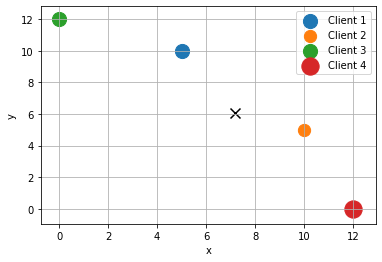

In [41]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(5, 10, s=200, label='Client 1')
plt.scatter(10, 5, s=150, label='Client 2')
plt.scatter(0, 12, s=200, label='Client 3')
plt.scatter(12, 0, s=300, label='Client 4')
plt.grid(which="both")
plt.scatter(x.x, y.x, s=100, marker="x", c="black")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()